In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

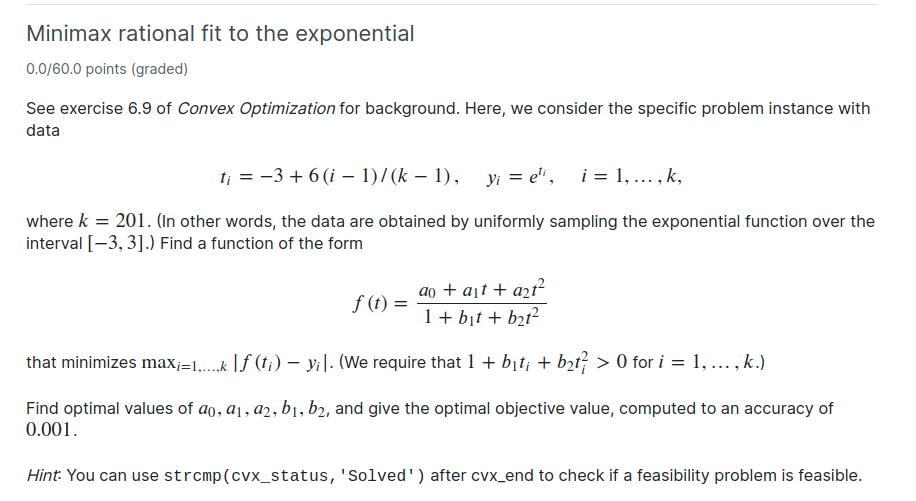

In [2]:
k = 201
t = np.linspace(-3,3,k).reshape(-1,1)
y = np.exp(t)
T = np.hstack((np.ones_like(t), t, t**2))

$|y_i - \frac{p_1(a)}{p_2(b)}| <= \alpha$


$|y_i p_2(b) - p_1(a)| <= \alpha p_2(b)$

In [3]:
a = cp.Variable((3,1))
b = cp.Variable((2,1))
alpha = cp.Parameter()
den = (T @ cp.vstack([np.ones((1,1)), b]))
constraints = [cp.abs(cp.multiply(y , den) - (T@a)) <= alpha * den]
prob = cp.Problem(cp.Minimize(0), constraints = constraints)

lo = 0 
hi = np.abs(y).max()
tol = 1e-4

while hi-lo >= tol:
    mid = lo + (hi-lo)/2
    alpha.value = mid
    prob.solve()
    if prob.status == cp.OPTIMAL:
        hi = mid
        a_ = a.value
        b_ = b.value
        fo = mid
    else:
        lo = mid

assert (T @ np.vstack(([[1]], b_)) > 0).all()

print('minimum alpha:', fo)
print('a values\n', a_)
print('b values\n', b_)


minimum alpha: 0.022756212105509713
a values
 [[1.00985029]
 [0.61213398]
 [0.1134348 ]]
b values
 [[-0.41454015]
 [ 0.04848569]]
